# أستكشاف بيانات الملف الأصلي 

# المرحلة التانية: المعالجة

# القيم المتطرفة: IQR

## Necessary library loading 

In [1]:
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initial phase, dataset load

## DataSet with Miss-data

In [2]:
BC= p.read_csv('bc_with_mis_90.csv')


In [3]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,...,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,...,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,...,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,...,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,...,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,...,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,...,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,...,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,...,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1


## Dataset size

In [4]:
print(BC.shape)

(2437, 23)


In [5]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,...,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,...,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,...,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,...,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,...,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


In [6]:
BC.tail()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
2432,1,30,Algatroon,70.0,28.0,0.7,5.9,9.5,63.0,23.0,...,3.9,5.23,11.3,288.0,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.2,8.8,82.0,23.0,...,4.8,4.57,13.2,249.0,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.4,8.1,22.0,15.0,...,4.4,4.32,11.1,249.0,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.9,8.2,51.0,17.0,...,4.5,4.41,12.9,293.0,13.0,254.0,147.5,3.15,107.5,1
2436,1,68,Sabha,90.0,29.0,0.6,5.3,8.5,83.0,20.0,...,3.4,4.42,11.0,199.0,15.0,254.0,142.3,3.23,107.5,1


## Info Data

In [7]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
T_Ca         2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [8]:
# Distributions values of all Features

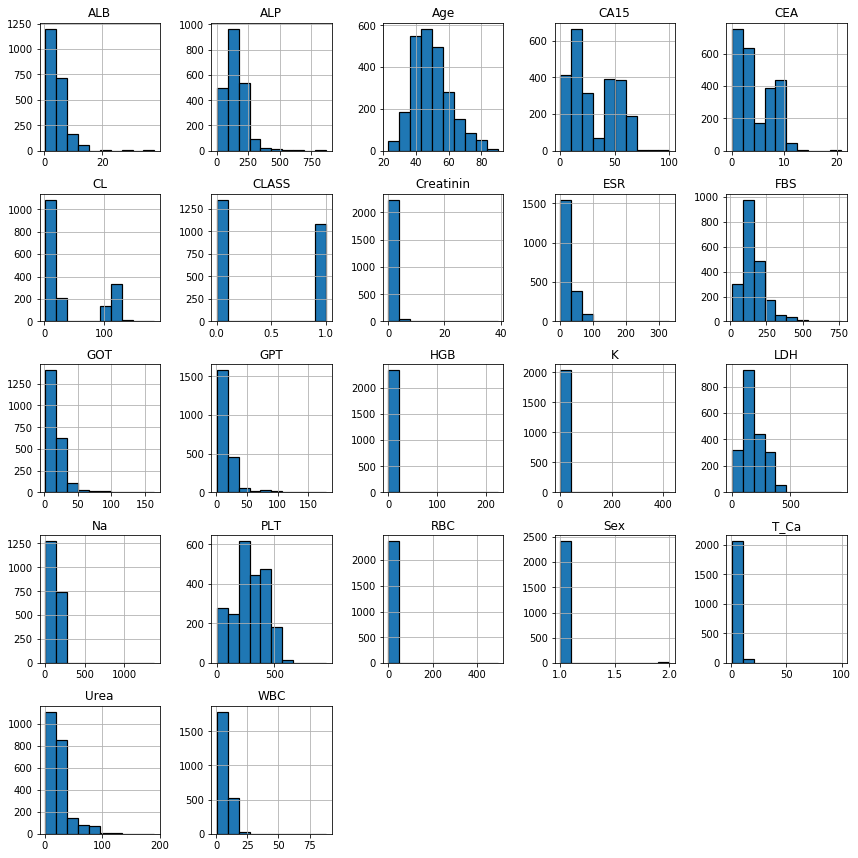

In [9]:

BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

## Statistics 

It shows the following measures separately for each feature:
- **count**: the number of non-null observations.
- **mean**: the mean of the values.
- **std**: the standard deviation of the values.
- **min**: the minimum of the values.
- **max**: the maximum of the values.
- **25%**: the lower percentile.
- **50%**: the median.
- **75%**: the upper percentile.

In [10]:
BC.quantile([.25, .5, .75], axis = 0).T

,0.25,0.50,0.75
Sex,1.0000,1.00,1.00
Age,41.0000,48.00,55.00
FBS,99.0000,145.00,200.00
Urea,14.0000,21.00,29.00
Creatinin,0.7000,0.80,1.00
ALB,3.2875,3.80,4.50
T_Ca,7.9000,8.50,9.30
GPT,7.0000,13.00,19.00
GOT,9.0000,15.00,22.00
ALP,95.0000,145.00,187.00


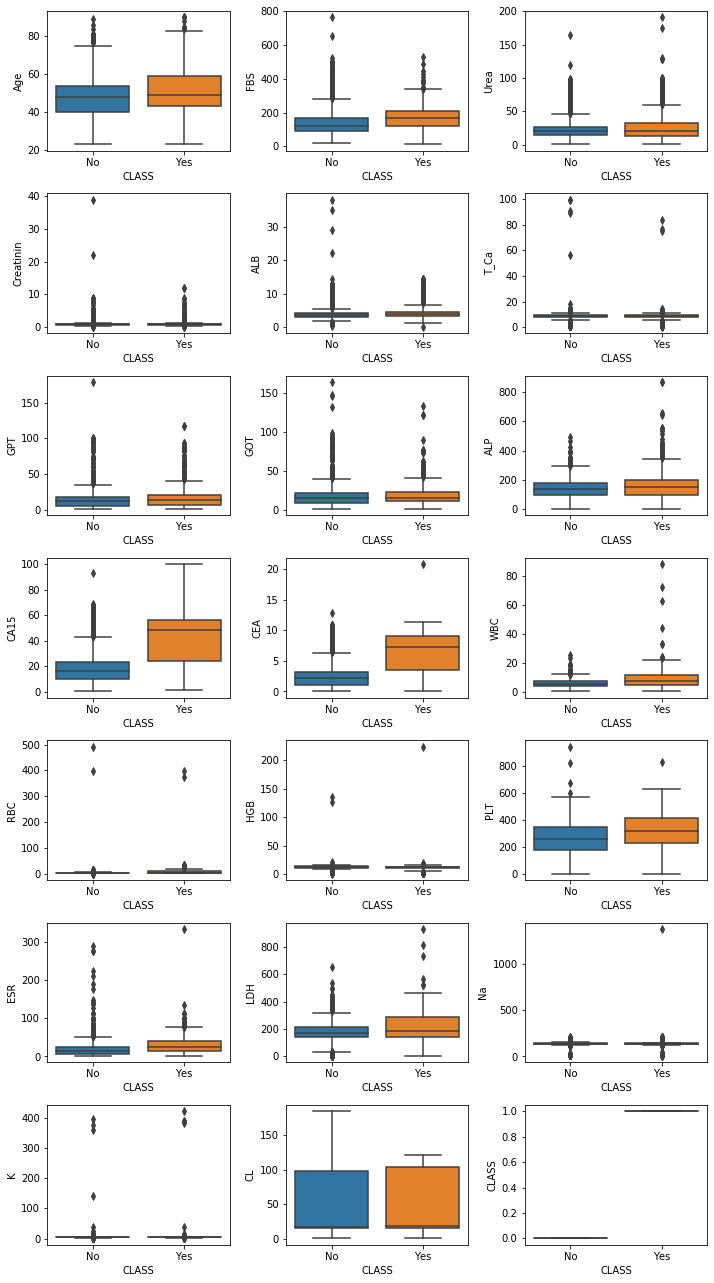

In [11]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

In [12]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          389
Urea         162
Creatinin    155
ALB          289
T_Ca         295
GPT          297
GOT          235
ALP          311
CA15           2
CEA            2
WBC          104
RBC           68
HGB          100
PLT          179
ESR          388
LDH          385
Na           426
K            398
CL           662
CLASS          0
dtype: int64

In [13]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["T_Ca"].fillna(BC["T_Ca"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)


In [14]:
out=['FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL' ]
for i in out:
    q25,q75=BC[i].quantile([.25,.75])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
#assigning nan to the outliers
    BC[i].values[BC[i] > maximum] = np.nan
    BC[i].values[BC[i] < minimum] = np.nan


In [15]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          103
Urea         234
Creatinin    252
ALB          257
T_Ca         393
GPT          147
GOT          132
ALP          168
CA15           0
CEA            1
WBC           94
RBC          492
HGB          372
PLT            3
ESR          263
LDH           56
Na           278
K             71
CL           482
CLASS          0
dtype: int64

In [16]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["T_Ca"].fillna(BC["T_Ca"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.000000,23.0,0.8,3.400000,8.616307,2.00000,1.0,...,3.4,4.60,13.400000,500.000000,25.0,150.0,145.000000,4.50,19.100000,0
1,1,53,Sabha,150.064888,22.0,0.7,4.461508,9.600000,3.00000,7.0,...,4.4,5.00,12.500000,283.554362,15.0,260.0,137.800000,4.18,19.100000,0
2,1,50,Sabha,150.064888,27.0,0.6,3.500000,9.300000,11.00000,17.0,...,5.1,4.46,12.500000,456.000000,2.0,169.0,139.200000,4.17,16.400000,0
3,1,36,Obaree-center,300.000000,15.0,1.1,4.200000,8.500000,13.00000,1.0,...,3.1,4.33,13.800000,600.000000,15.0,138.0,138.327392,4.00,1.100000,0
4,1,30,Obaree-center,150.064888,2.0,1.0,3.000000,8.000000,7.00000,13.0,...,4.2,4.13,12.220025,543.000000,25.0,154.0,136.400000,4.60,17.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.000000,28.0,0.7,5.900000,9.500000,12.83896,23.0,...,3.9,5.23,11.300000,288.000000,15.0,254.0,138.700000,4.35,25.041995,1
2433,1,47,Sabha,98.000000,32.0,0.8,3.798338,8.800000,12.83896,23.0,...,4.8,4.57,13.200000,249.000000,12.0,254.0,142.300000,4.40,25.041995,1
2434,1,43,Sabha,76.000000,15.0,0.6,3.798338,8.100000,22.00000,15.0,...,4.4,4.32,11.100000,249.000000,8.0,254.0,137.800000,4.25,25.041995,1
2435,1,60,Sabha,120.000000,29.0,0.9,3.798338,8.200000,12.83896,17.0,...,4.5,4.41,12.900000,293.000000,13.0,254.0,147.500000,3.15,25.041995,1


In [17]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
T_Ca         0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

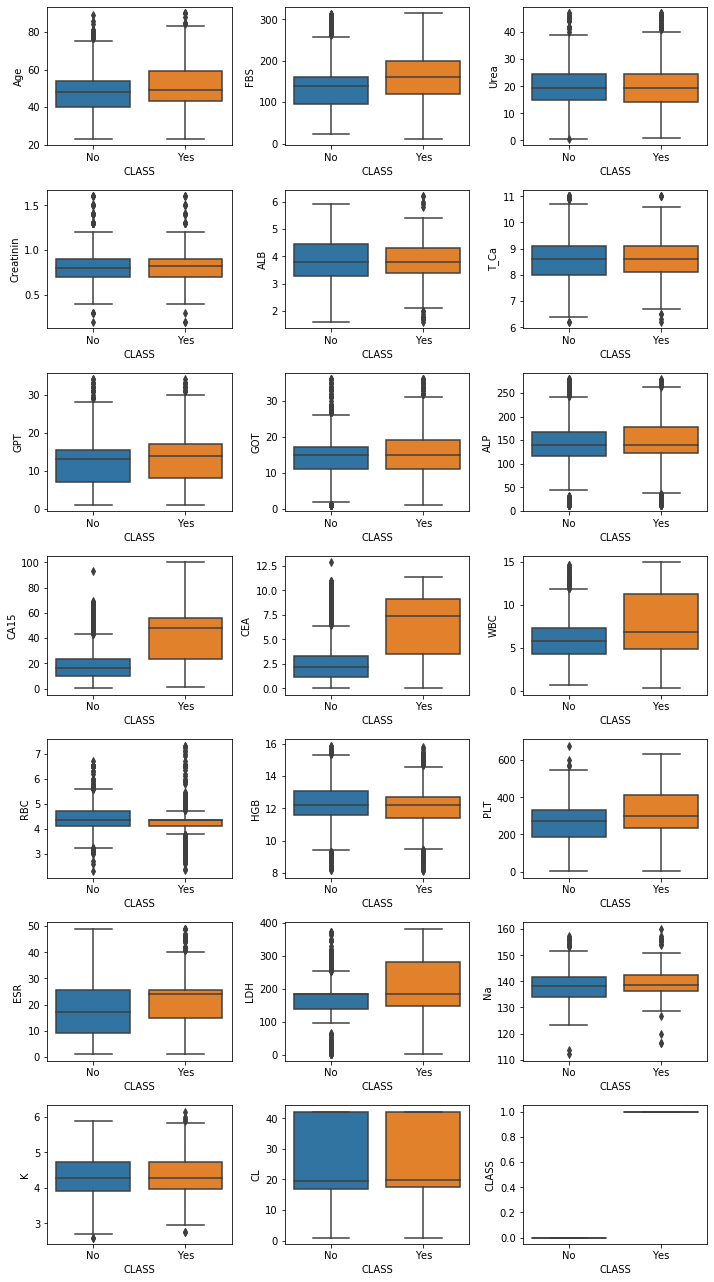

In [18]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

## Distributions values of all Features


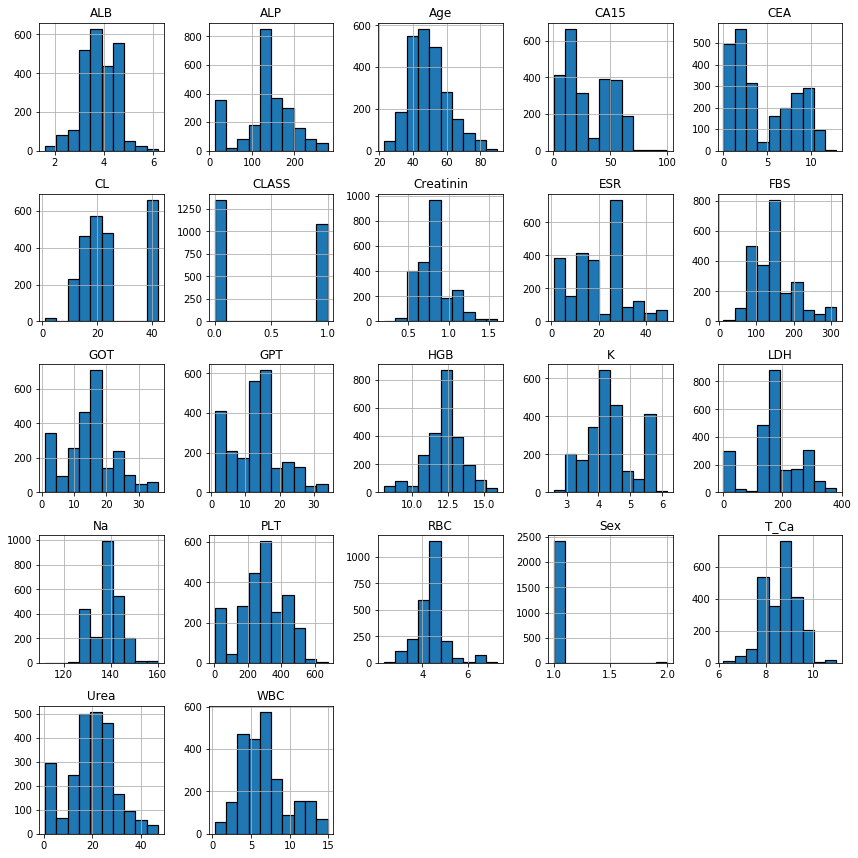

In [19]:
BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

## Missing value investigation 


In [20]:
BC.isnull().sum()

Sex          0
Age          0
Adress       0
FBS          0
Urea         0
Creatinin    0
ALB          0
T_Ca         0
GPT          0
GOT          0
ALP          0
CA15         0
CEA          0
WBC          0
RBC          0
HGB          0
PLT          0
ESR          0
LDH          0
Na           0
K            0
CL           0
CLASS        0
dtype: int64

## Correlation Analysis

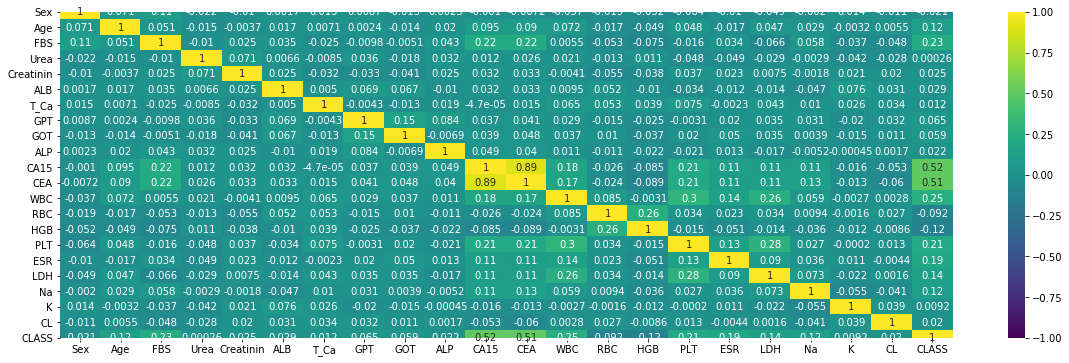

In [21]:
plt.figure(figsize=(20,6))
sns.heatmap(BC.corr(),annot=True,center=0, cmap='viridis',vmin=-1,
    vmax=1)

In [22]:
mask=np.zeros_like(BC.corr())
triangle_indices= np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

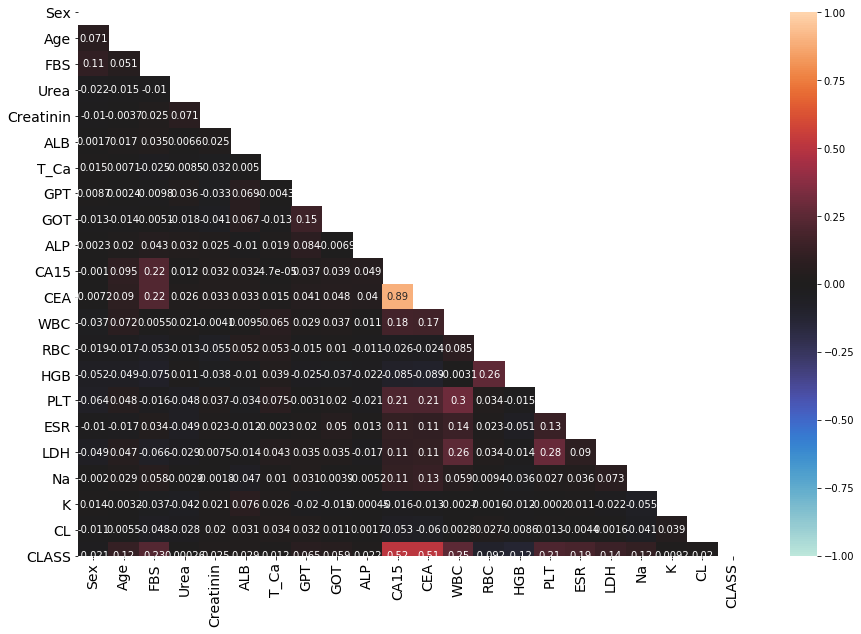

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(BC.corr(),mask=mask,annot=True,center=0, vmin=-1,
    vmax=1)

BC.corr()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



## The best 10 features by Correlation Analysis

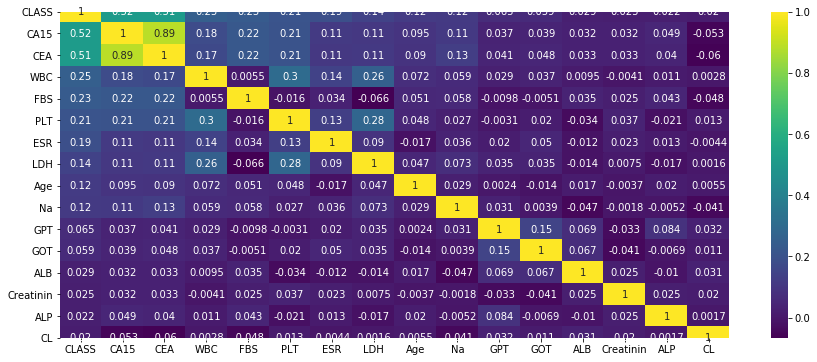

In [24]:
k = 16 #number of variables for heatmap
cols = BC.corr().nlargest(k, 'CLASS')['CLASS'].index
cm = BC[cols].corr()
plt.figure(figsize=(15,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Outier investigation

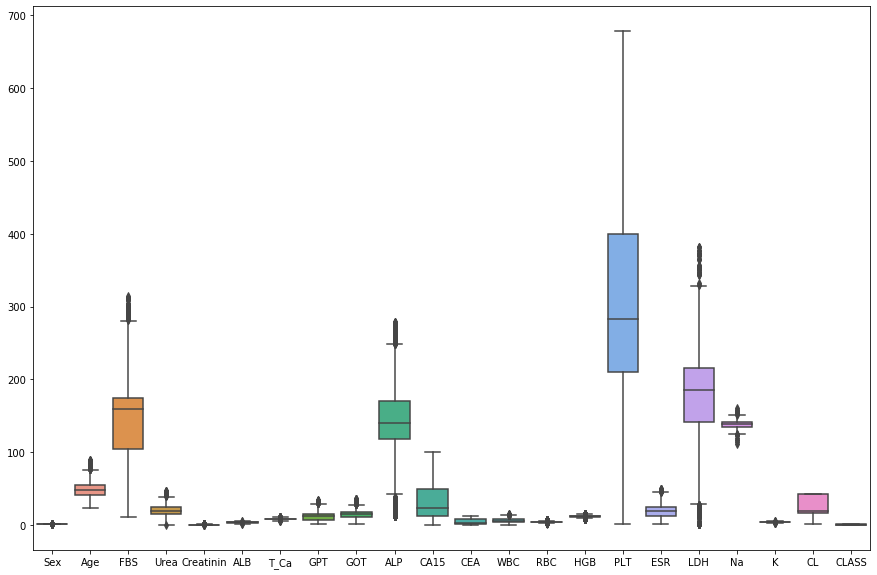

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC)


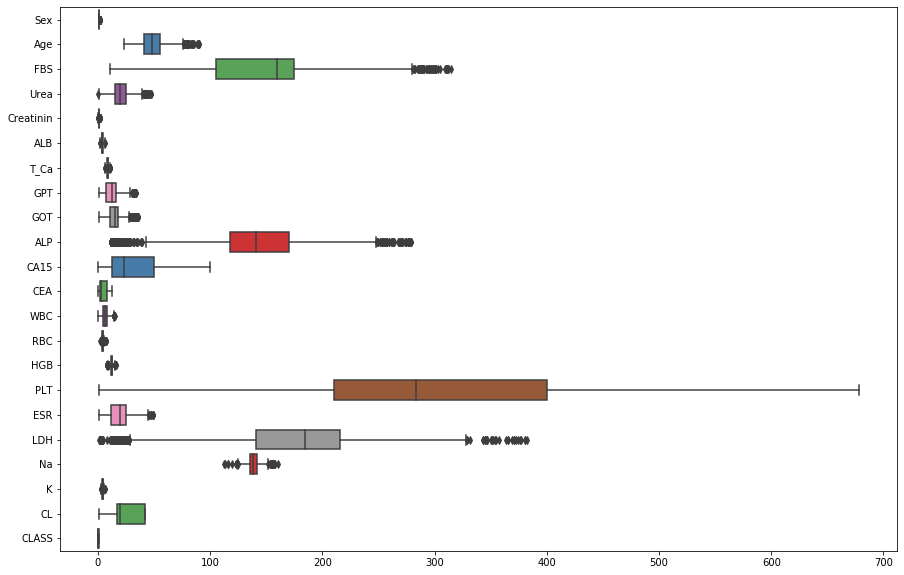

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC,orient="h", palette="Set1")


## Let's now investigate more closely the distributions of these features separately for the two classes using Crosstabs:

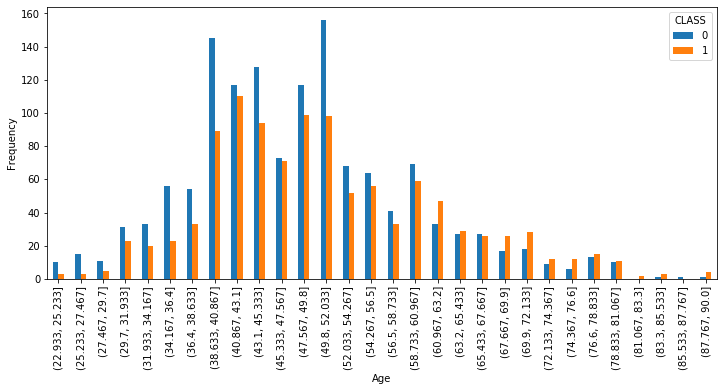

In [27]:
p.crosstab( p.cut(BC.Age,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

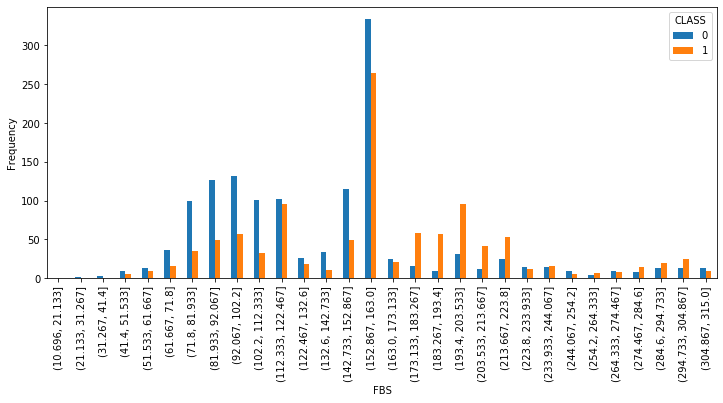

In [28]:
p.crosstab( p.cut(BC.FBS,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

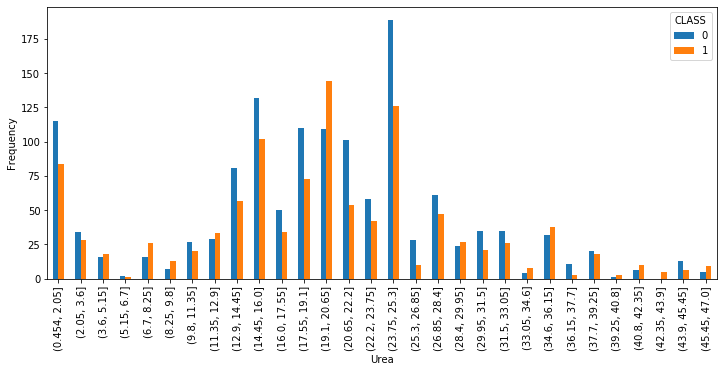

In [29]:
p.crosstab( p.cut(BC.Urea,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

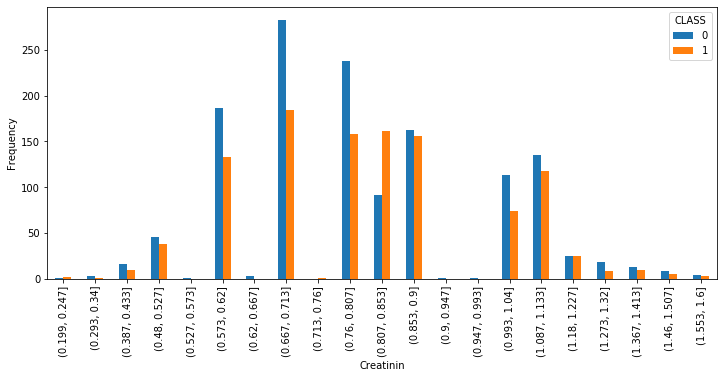

In [30]:
p.crosstab( p.cut(BC.Creatinin,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

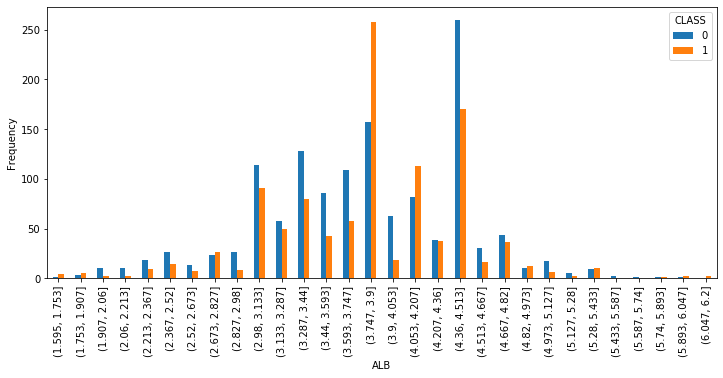

In [31]:
p.crosstab( p.cut(BC.ALB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

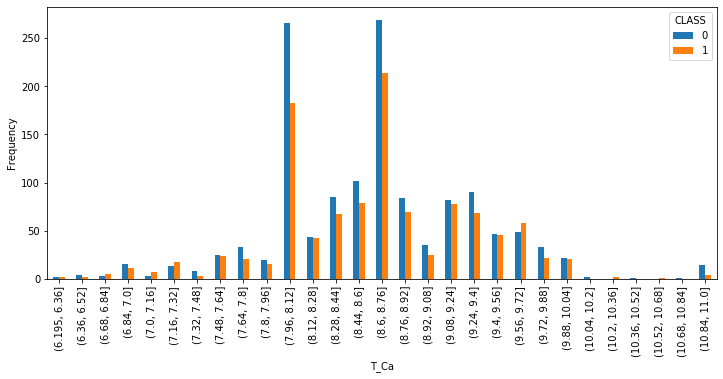

In [32]:
p.crosstab( p.cut(BC.T_Ca,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

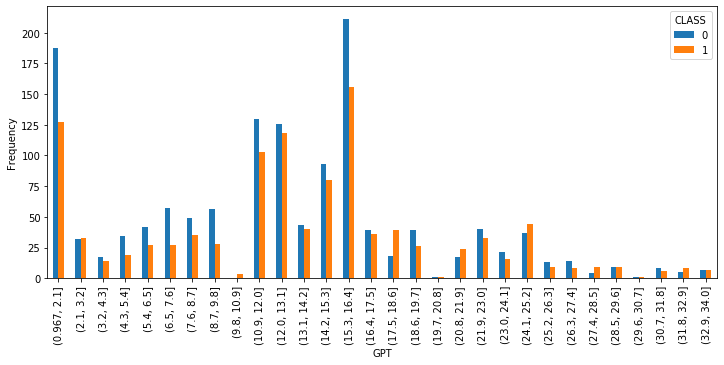

In [33]:
p.crosstab( p.cut(BC.GPT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

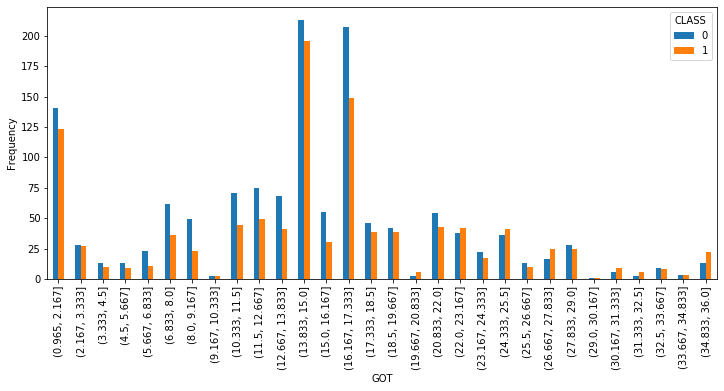

In [34]:
p.crosstab( p.cut(BC.GOT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

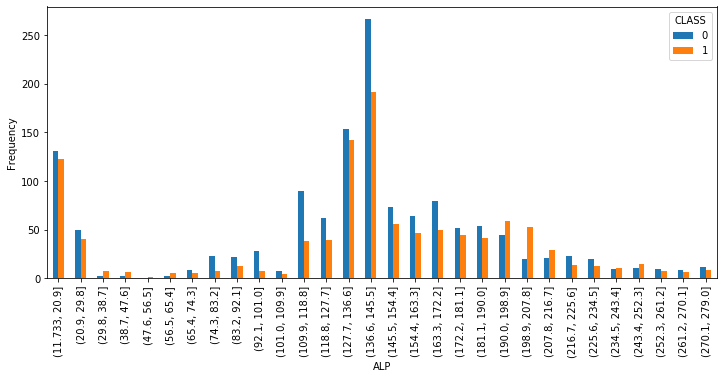

In [35]:
p.crosstab( p.cut(BC.ALP,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

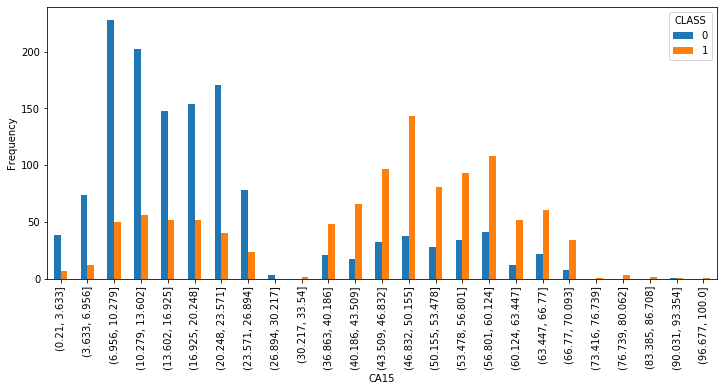

In [36]:
CA=BC['CA15']
p.crosstab( p.cut(CA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

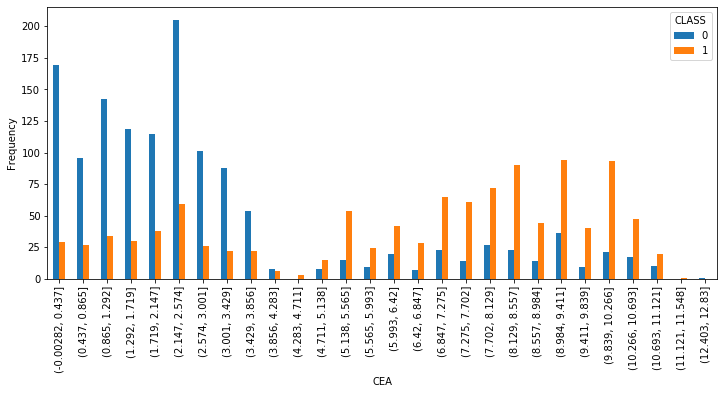

In [37]:
p.crosstab( p.cut(BC.CEA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

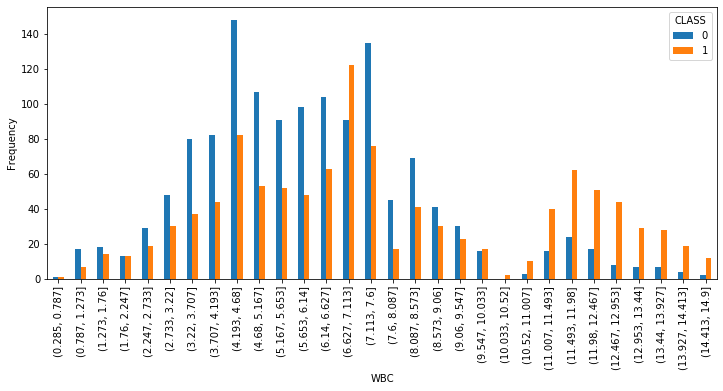

In [38]:
p.crosstab( p.cut(BC.WBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

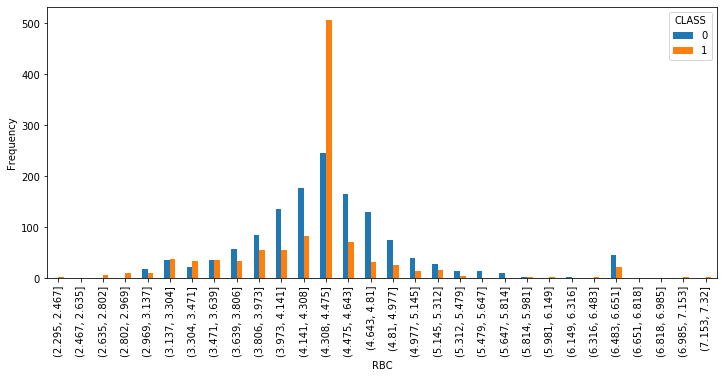

In [39]:
p.crosstab( p.cut(BC.RBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

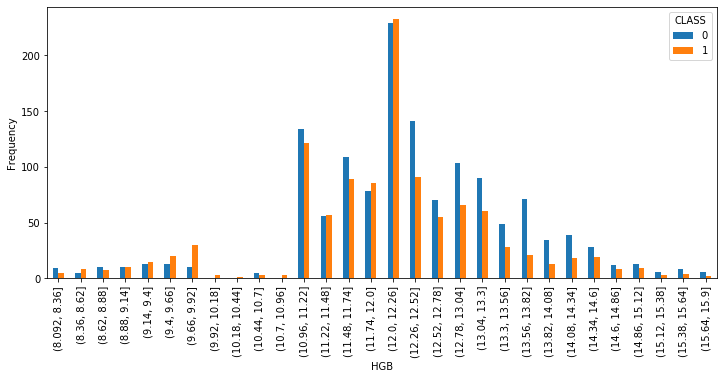

In [40]:
p.crosstab( p.cut(BC.HGB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

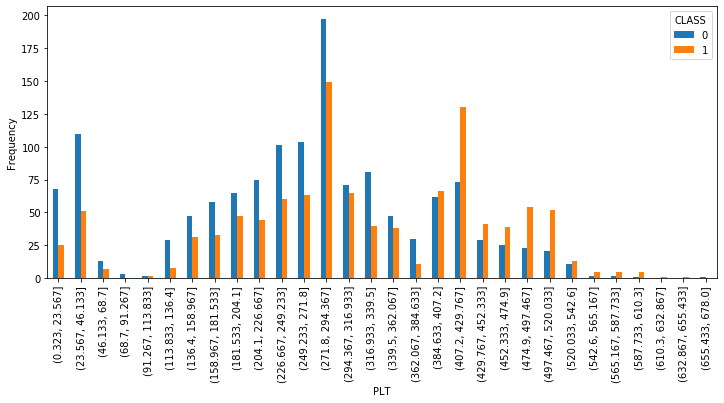

In [41]:
p.crosstab( p.cut(BC.PLT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

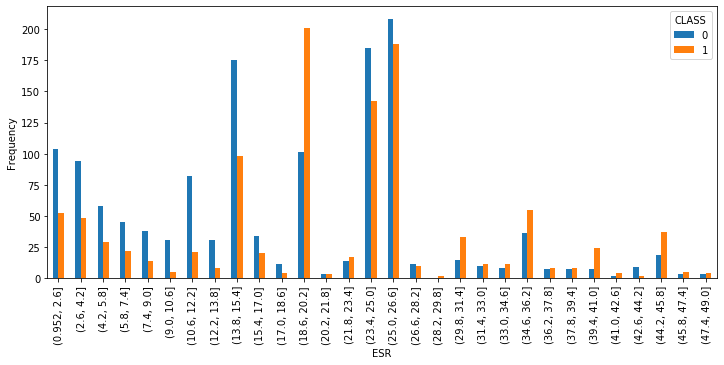

In [42]:
p.crosstab( p.cut(BC.ESR,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

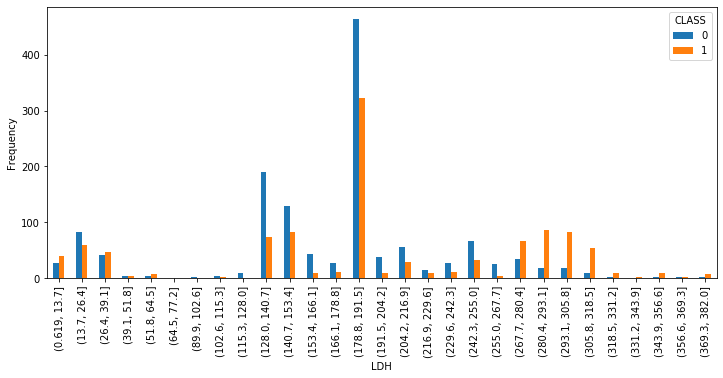

In [43]:
p.crosstab( p.cut(BC.LDH,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

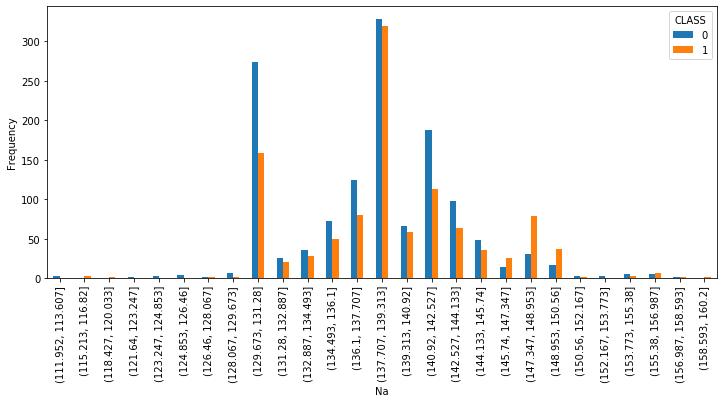

In [44]:
p.crosstab( p.cut(BC.Na,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

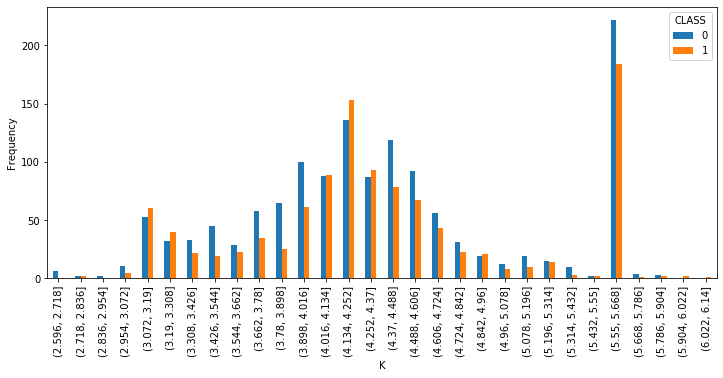

In [45]:
p.crosstab( p.cut(BC.K,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

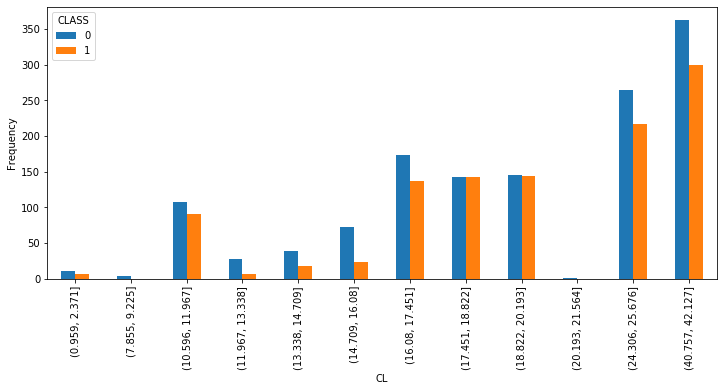

In [46]:
p.crosstab( p.cut(BC.CL,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [48]:
X=BC.drop(["CLASS"],axis=1)
y=BC["CLASS"]  

In [49]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0) 


In [50]:
## قبل الضبط البارميترات

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [51]:
y_pred=D_classifier.predict_proba(X_test)[:,1]
new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

In [52]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.819672131147541

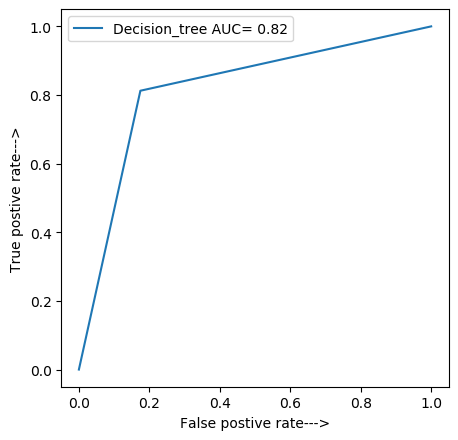

In [53]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,new_y)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(dec_fpr,dec_tpr,linestyle='-',label='Decision_tree AUC=% 0.2f' % auc_dec)

plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,new_y,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,new_y,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)

mean_absolute_error is = 0.18032786885245902
mean_squared_error is = 0.4246502900652006


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.819672131147541
[[279  59]
 [ 51 221]]


Text(33.0, 0.5, 'Acutl')

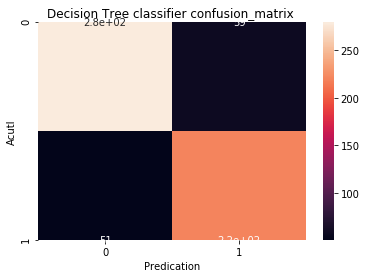

In [55]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(X_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [56]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       338
           1       0.79      0.81      0.80       272

    accuracy                           0.82       610
   macro avg       0.82      0.82      0.82       610
weighted avg       0.82      0.82      0.82       610

accuracy_score= 0.819672131147541
